# Prepare Data

In [1]:
!pip install -U libsvm-official

import numpy as np
from libsvm.svmutil import *
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.32.0-cp310-cp310-linux_x86_64.whl size=123886 sha256=0cd7e5c5d5bc2283010ba61474c3d1f01d8e4ea24cf8791e289a1985b05e989f
  Stored in directory: /root/.cache/pip/wheels/61/3b/1b/73bb4869517f96a26c82b47ccdb9ec48f12f4466de2371eff6
Successfully built libsvm-official


/usr/local/lib/python3.10/dist-packages/libsvm/svm.py:147: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def csr_to_problem_jit(l, x_val, x_ind, x_rowptr, prob_val, prob_ind, prob_rowptr, indx_start):


In [2]:
def reLabel(data, target):
  new_data = [1 if item == target else -1 for item in data]
  return new_data

In [3]:
Y_train, X_train = svm_read_problem("/content/train.txt")
Y_test,  X_test  = svm_read_problem("/content/test.txt")

X_lower = min(X_train[0].keys())
X_upper = max(X_train[0].keys())

# Problem 9

In [ ]:
y_train = reLabel(Y_train, 4)

C = [0.1, 1, 10]
Q = [2, 3, 4]

In [ ]:
minSVs = len(X_train)
best_c = C[0]
best_q = Q[0]

for c in C:
  for q in Q:

    model = svm_train(y_train, X_train, f'-s 0 -c {c} -d {q} -t 1 -g 1 -r 1')
    p_label, p_acc, p_val = svm_predict(y_train, X_train, model)

    SVs = model.get_nr_sv()
    print(f'C = {c}, Q = {q}, SVs = {SVs}')
    if SVs < minSVs:
      minSVs = SVs
      best_c = c
      best_q = q

print(f'C = {best_c}, Q = {best_q} results in the smallest number of support vectors')

Accuracy = 92.1759% (4088/4435) (classification)
C = 0.1, Q = 2, SVs = 860
Accuracy = 94.6336% (4197/4435) (classification)
C = 0.1, Q = 3, SVs = 789
Accuracy = 97.1815% (4310/4435) (classification)
C = 0.1, Q = 4, SVs = 740
Accuracy = 94.4983% (4191/4435) (classification)
C = 1, Q = 2, SVs = 783
Accuracy = 96.9109% (4298/4435) (classification)
C = 1, Q = 3, SVs = 721
Accuracy = 99.4363% (4410/4435) (classification)
C = 1, Q = 4, SVs = 666
Accuracy = 95.9865% (4257/4435) (classification)
C = 10, Q = 2, SVs = 712
Accuracy = 99.1657% (4398/4435) (classification)
C = 10, Q = 3, SVs = 659
Accuracy = 100% (4435/4435) (classification)
C = 10, Q = 4, SVs = 629
C = 10, Q = 4 results in the smallest number of support vectors


# Problem 10

In [ ]:
y_train = reLabel(Y_train, 1)
y_test  = reLabel(Y_test, 1)

C = [0.01, 0.1, 1, 10, 100]

In [ ]:
minEout = 1
best_c  = C[0]

for c in C:

  model = svm_train(y_train, X_train, f'-s 0 -c {c} -t 2 -g 1')
  p_label, p_acc, p_val = svm_predict(y_test, X_test, model)

  Eout = 1 - p_acc[0]/100
  if Eout < minEout:
    minEout = Eout
    best_c  = c

print(f'C = {best_c} results in the lowest Eout')

Accuracy = 95.4% (1908/2000) (classification)
Accuracy = 98.8% (1976/2000) (classification)
Accuracy = 99.5% (1990/2000) (classification)
Accuracy = 99.4% (1988/2000) (classification)
Accuracy = 99.45% (1989/2000) (classification)
C = 1 results in the lowest Eout


# Problem 11

In [ ]:
def shuffle_and_split(x, y, N):
  indices = np.random.permutation(len(y))
  x_shuffled = np.array(x)[indices]
  y_shuffled = np.array(y)[indices]

  x_val   = x_shuffled[:N]
  y_val   = y_shuffled[:N]
  x_train = x_shuffled[N:]
  y_train = y_shuffled[N:]

  return x_val, y_val, x_train, y_train

In [ ]:
y_train_relabel = reLabel(Y_train, 1)

C = [0.01, 0.1, 1, 10, 100]

In [ ]:
best_c_list = []

for _ in range(1000):
  np.random.seed(_)
  x_val, y_val, x_train, y_train = shuffle_and_split(X_train, y_train_relabel, 200)

  minEval = 1
  best_c  = C[0]

  for c in C:
    model = svm_train(y_train, x_train, f'-s 0 -c {c} -t 2 -g 1')
    p_label, p_acc, p_val = svm_predict(y_val, x_val, model, '-q')

    Eval = 1 - p_acc[0]/100
    if Eval < minEval:
      minEval = Eval
      best_c  = c

  best_c_list.append(best_c)

In [ ]:
c0,c1,c2,c3,c4 = 0,0,0,0,0


for item in best_c_list:
  if item == 0.01:
    c0 += 1
  elif item == 0.1:
    c1 += 1
  elif item == 1:
    c2 += 1
  elif item == 10:
    c3 += 1
  elif item == 100:
    c4 += 1

print(c0,c1,c2,c3,c4)

0 195 380 413 12


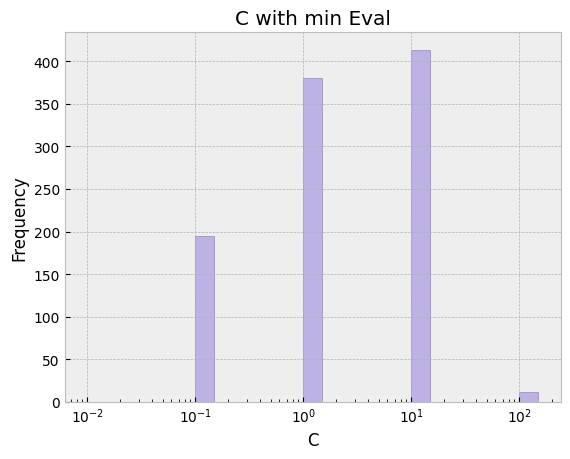

In [ ]:
plt.hist(best_c_list, bins=[0.01, 0.015, 0.1, 0.15, 1, 1.5, 10, 15, 100, 150], color='#7859D8', edgecolor='#400E7B', alpha=0.4, linewidth=0.5)
plt.style.use('bmh')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Frequency")
plt.title("C with min Eval")
plt.show()

# Problem 12

In [5]:
def K(Xn, Xm):

    Xn, Xm = np.array(Xn), np.array(Xm)

    distance_squared = np.sum((Xn - Xm) ** 2)

    return np.exp(-distance_squared)

In [6]:
import math

def w_length(coef, vect):
  dim    = len(coef)
  result = 0
  for i in range(dim):
    for j in range(dim):
      result += coef[i] * coef[j] * K(vect[i], vect[j])
  return math.sqrt(result)

In [7]:
y_train = reLabel(Y_train, 3)

C = [0.01, 0.1, 1, 10, 100]

In [8]:
length_w_list = []

for c in C:

  model = svm_train(y_train, X_train, f'-s 0 -c {c} -t 2 -g 1')

  sv_coef     = model.get_sv_coef()
  sv_vect     = model.get_SV()
  sv_coef_arr = np.ravel(sv_coef)
  sv_vect_arr = np.array([[item.get(i, 0) for i in range(1, 37)] for item in sv_vect])
  length_w_list.append(w_length(sv_coef_arr, sv_vect_arr))

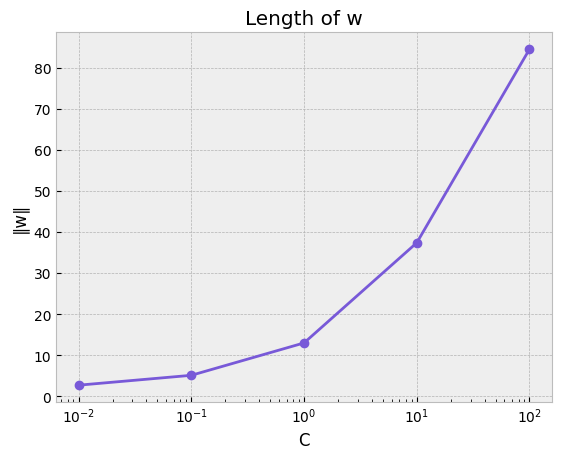

In [10]:
plt.plot(C, length_w_list, marker='o', linestyle='-', color='#7859D8')

plt.style.use('bmh')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('∥w∥')
plt.title('Length of w')
plt.show()